In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image, display # For displaying the graph

In [15]:
# Defining State
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category : str

In [8]:
def calc_bmi(state: BMIState) -> BMIState:
    wt = state["weight_kg"]
    ht = state["height_m"]
    bmi = wt / (ht ** 2)
    state["bmi"] = round(bmi, 2)
    return state

In [23]:
def label_bmi(state: BMIState) -> BMIState:
    bmi_val = state["bmi"]
    if bmi_val < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi_val <= 25:
        state["category"] = "Normal"
    elif 25 <= bmi_val <= 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
    return state

In [24]:
# Define Graph
graph = StateGraph(BMIState)

# Add nodes to graph
graph.add_node("calc_bmi", calc_bmi)
graph.add_node("label_bmi", label_bmi)

# Add Edges to the graph
graph.add_edge(START, "calc_bmi")
graph.add_edge("calc_bmi","label_bmi")
graph.add_edge("label_bmi", END)

# Compile the graph
workflow = graph.compile()

In [25]:
# Execute the graph
initial_state = {"weight_kg" : 80, "height_m" : 1.73}
final_state = workflow.invoke(initial_state)
final_state

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}

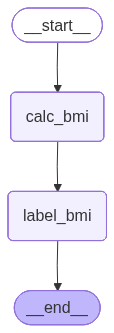

In [26]:
# Visualize the graph
Image(workflow.get_graph().draw_mermaid_png())